## **Problem Statement**
**[Problem URL]:(https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)**

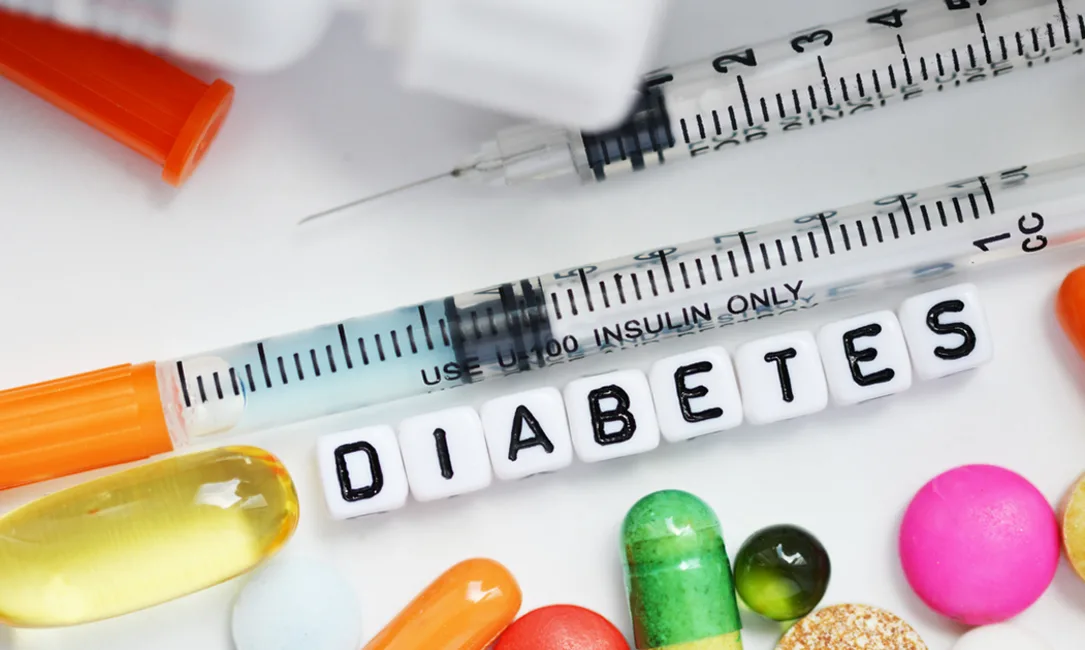

*   Pima Indians Diabetes Database this dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

*   The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

*  In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Scenario**

*   In order to solve this partticular problem statement National Institute of Diabetes has hired you as a Data Scientist.

*  They want to make sure that the AI/ML model that you will make is a high accurate model.  



# **Importing Libraries**

In [111]:
import numpy as np                  #Importing numpy library
import pandas as pd                 #Importing pandas library
import matplotlib.pyplot as plt     #Importing matplotlib library
import seaborn as sns               #Importing seaborn library
%matplotlib inline

## **Loading the dataset**

In [112]:
data = pd.read_csv("/content/diabetes.csv")
print("The shape of the data is :",data.shape)
data.head()

The shape of the data is : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Observation**
The data has 768 rows and 9 columns.

# **Data Description**



*   Pregnancies: Number of times pregnant
*   Glucose: Glucose level
*   BloodPressure: Blood pressure
*   SkinThickness:  Triceps Skin fold thickness
*   Insulin: Insulin level
*   BMI: Body Mass Index
*   DiabetesPedigreeFunction: A function that calculates the likelihood of having diabetes based on THE family members.
*   Age: Age (in years)
*   Outcome: Information about whether the individual has diabetes or not. Affected by the disease (1) or Not (0)

In [113]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Data Exploration**

*   Checking null values.
*   Inconsistancy of the data
*   Checking the Categorical and Continious distribution of data.
*   Data information
*   Data Description


**Checking Null Values**

In [114]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observation:**

We dont have any null values in the data.

**Data Inconsistancy Check**

In [115]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Observation:**

The data is clean and we dont need to perform any further inconsistancy operation.

# **Checking Data Info | Categorical Continious Distribution of Data**

In [116]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**Observations:**

*   There are 2 float type data.
*   There are 7 integer data columns.

## **Data Description**

In [117]:
data.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Exploratory Data Analysis(EDA)**

In [118]:
def categorical_and_continious_separation(data):
    categorical_cols,continious_cols = [],[]
    for col in data.columns:
      if data[col].dtypes == 'object':
        categorical_cols.append(col)
      else:
        continious_cols.append(col)
    return categorical_cols, continious_cols

In [119]:
categorical_cols, continious_cols = categorical_and_continious_separation(data)   #filter out categoriacl and continious data columns

In [120]:
continious_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# **Data Cleaning**

In [121]:
data["SkinThickness"] = data["SkinThickness"].replace(0, data["SkinThickness"].mean())

In [122]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [123]:
data["Insulin"] = data["Insulin"].replace(0, data["Insulin"].mean())

In [124]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


# **Data Visualization**

**Continious Distribution**

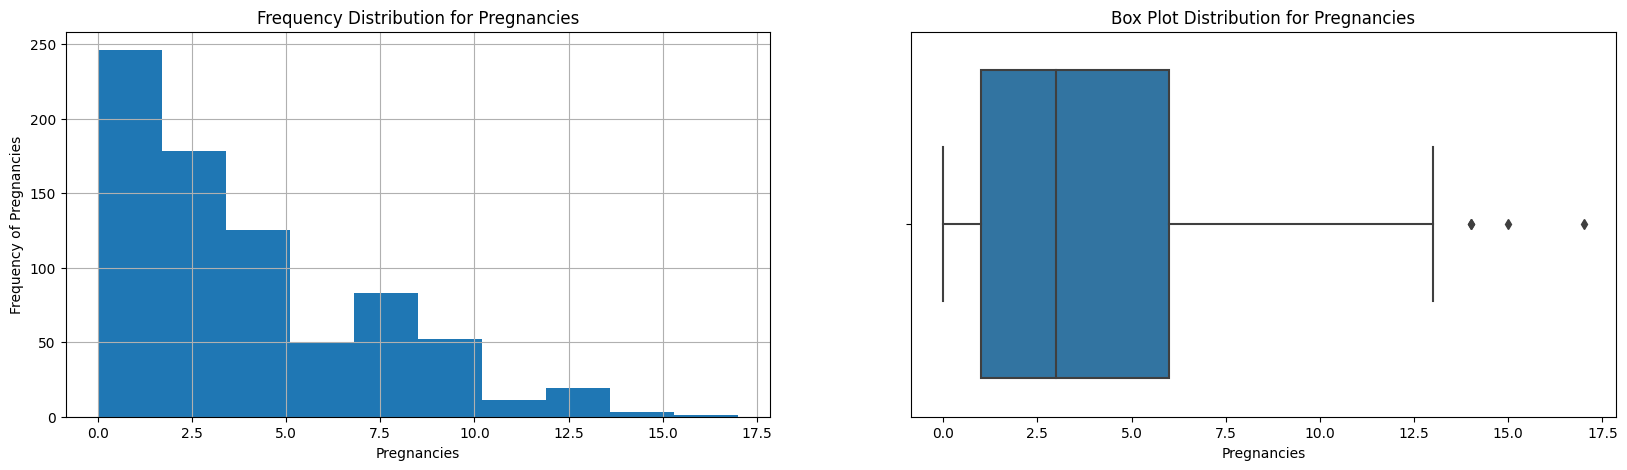

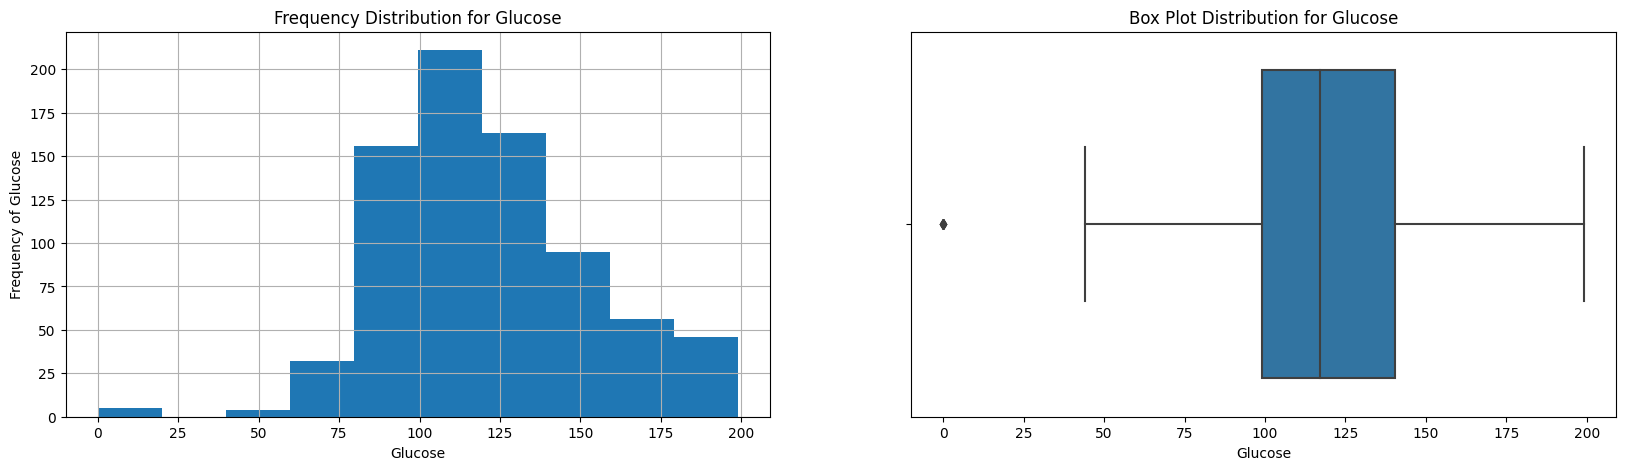

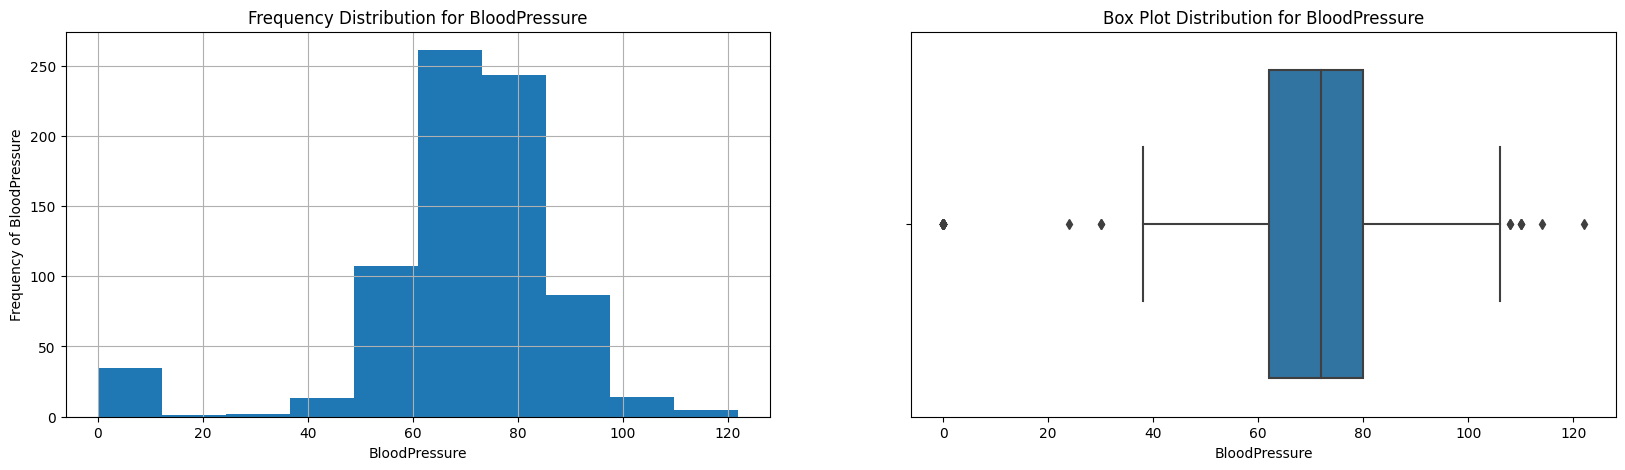

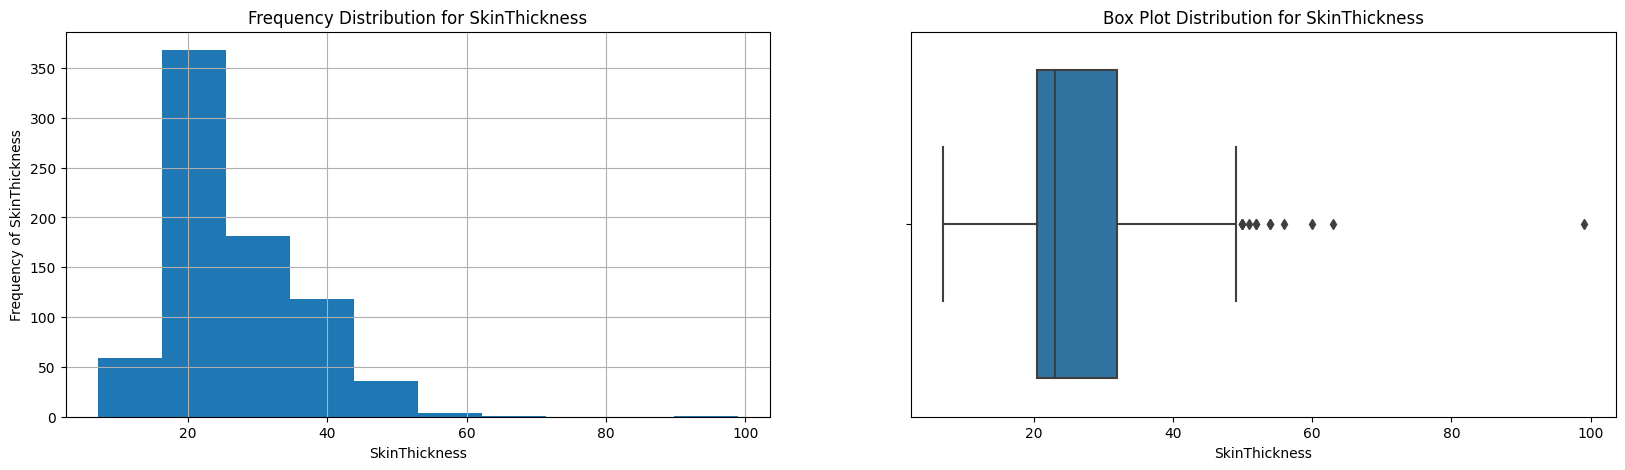

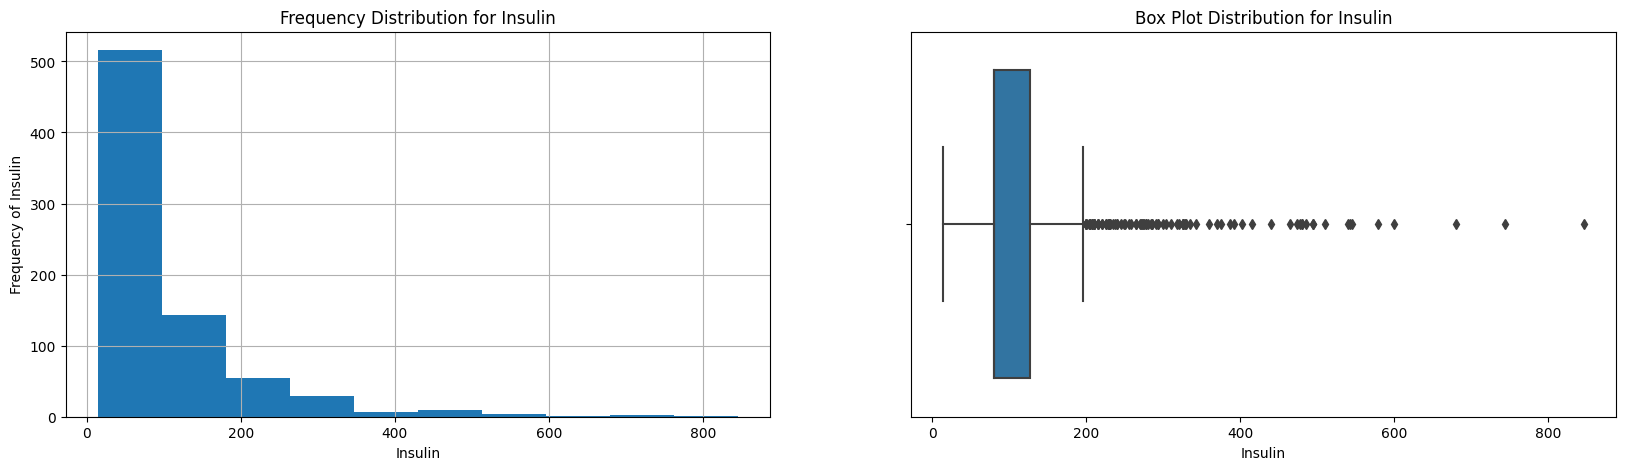

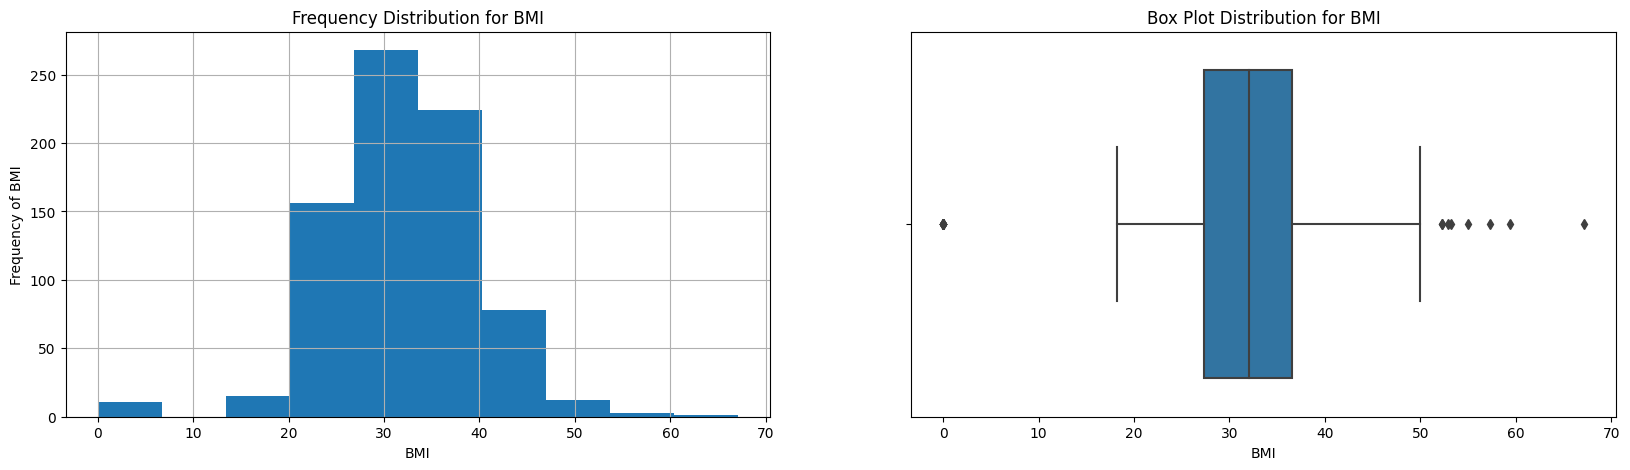

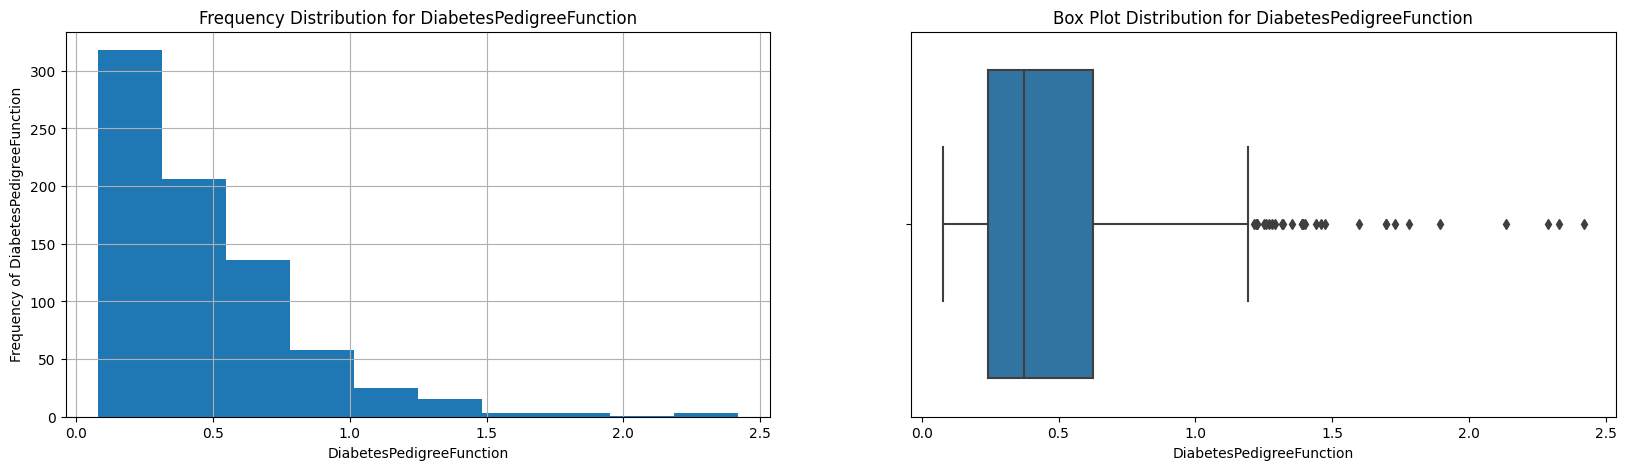

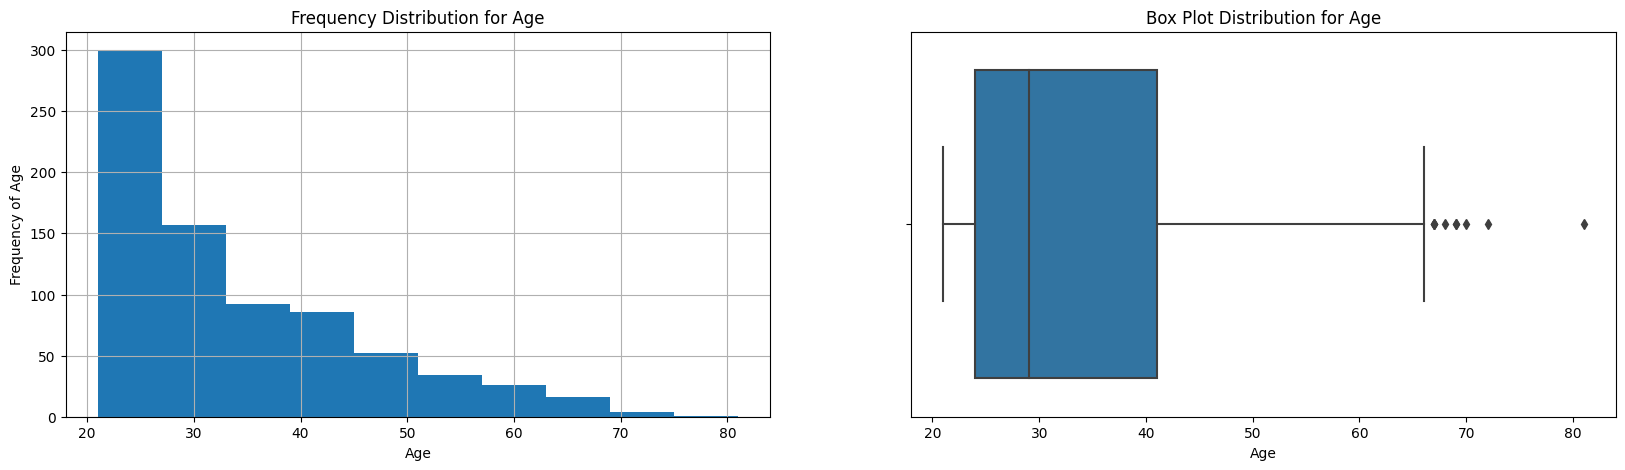

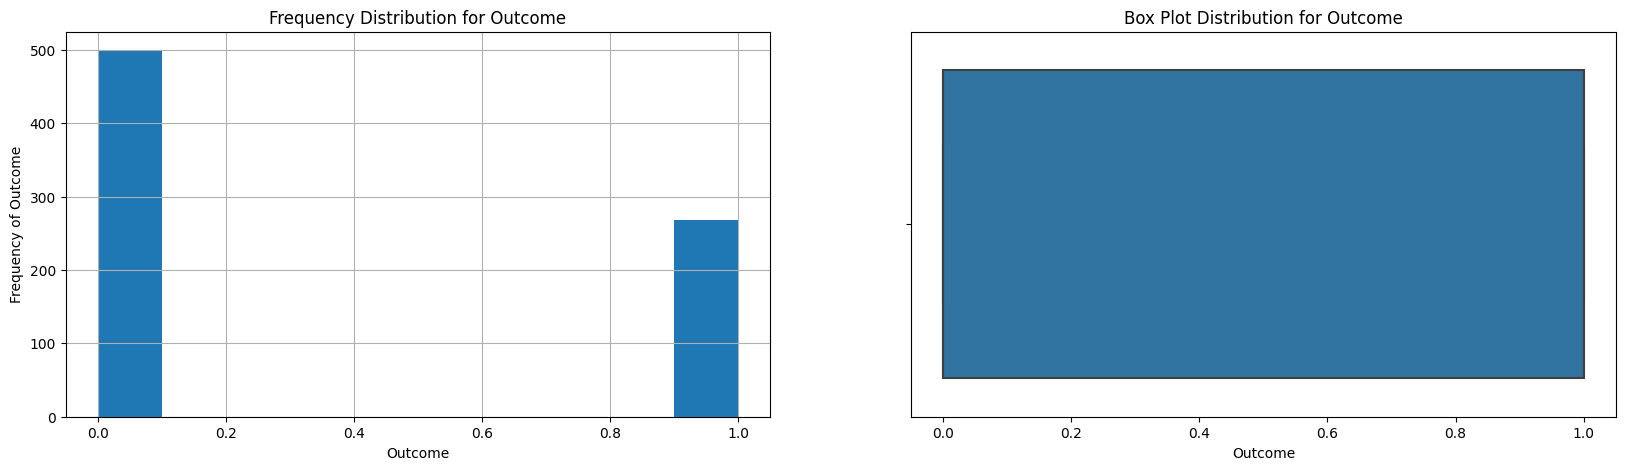

In [125]:
for col in continious_cols:
    plt.figure(figsize = [20,5])
    plt.subplot(1,2,1)
    # Plotting the freq distibution for 'col'
    plt.hist(data[col])
    # To bring the grid structure out of the data
    plt.grid();
    # Label the x axis
    plt.xlabel(col)
    # Label the y axis
    plt.ylabel("Frequency of {}".format(col))
    # Giving a title on the top
    plt.title("Frequency Distribution for {}".format(col))
    plt.subplot(1,2,2)
    sns.boxplot(data = data, x =col)
    plt.title("Box Plot Distribution for {}".format(col))
    plt.savefig("continious_distribution_for_{}_.PNG".format(col))
    # to remove the array data
    plt.show();

# **Train and Test Data**

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
#Define the Feature and the target
X = data.drop(["Outcome"], axis = 1)     # Except for Outcome all the other data is my features. Hence, we need to drop it.
y = data["Outcome"]                      # Outcome is the target

In [128]:
# Training data
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [129]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [130]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [131]:
X_train.shape

(614, 8)

In [132]:
X_test.shape

(154, 8)

# **Data Modelling**

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logReg = LogisticRegression()

In [135]:
logReg.fit(X_train, y_train)      # Logistic model Ready

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred = logReg.predict(X_test)           # Return Predictions

In [137]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [138]:
df = pd.DataFrame({"Actual Values": y_test,
                   "Predicted Values": y_pred})

In [139]:
df

,Actual Values,Predicted Values
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


# **Getting the Accuracy Score**

In [140]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy for unseen data is : {model_accuracy}%")

The accuracy for unseen data is : 75.32467532467533%


**Classification Report**

In [141]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("The model classification report is: \n", report)

The model classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### **Confusion Matrix**

In [142]:
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(y_test, y_pred)
print("The model confusion matrix is: \n", cn_matrix)

The model confusion matrix is: 
 [[79 20]
 [18 37]]


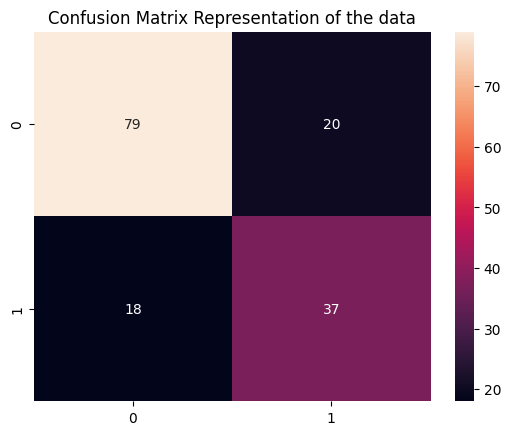

In [143]:
plt.title("Confusion Matrix Representation of the data")
sns.heatmap(cn_matrix, annot = True)
plt.show();

In [144]:
cn_matrix

array([[79, 20],
       [18, 37]])

In [145]:
true_positives  = cn_matrix[0][0]
false_negetives  = cn_matrix[0][1]
false_positives  = cn_matrix[1][0]
true_negetives  = cn_matrix[1][1]

In [146]:
cnf_data = pd.DataFrame({"TP":[true_positives],
                        "FN":[false_negetives],
                        "FP":[false_positives],
                        "TN":[true_negetives]})
cnf_data

,TP,FN,FP,TN
0,79,20,18,37


### **True Positive Ratio : TP / (TP + FN)**

In [147]:
tpr = cnf_data["TP"]/(cnf_data["TP"]+ cnf_data["FN"])
print("TPR : ", tpr)

TPR :  0    0.79798
dtype: float64


### **False Negetive Ratio (FNR) : FN / TP + FN**

In [148]:
fnr = cnf_data["FN"]/(cnf_data["TP"]+ cnf_data["FN"])
print("FNR : ", fnr)

FNR :  0    0.20202
dtype: float64


### **False Postive Ratio (FPR) : FP / FP + TN**

In [149]:
fpr = cnf_data["FP"]/(cnf_data["FP"]+ cnf_data["TN"])
print("FPR : ", fpr)

FPR :  0    0.327273
dtype: float64


### **TRUE NEGETIVE RATIO (TNR): TN / FP + TN**

In [150]:
tnr = cnf_data["TN"]/(cnf_data["FP"]+ cnf_data["TN"])
print("TNR : ", tnr)

TNR :  0    0.672727
dtype: float64


###**Standerdizartion and Normalization**

In [151]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


### **StanderdScaler Class**

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [154]:
X_test_scaled = scaler.transform(X_test) # rIGHT APPROACH
X_test_scaled

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

### **MinMaxScaler Class**

In [155]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train)
X_train_norm

array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [156]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_test_norm = minmax_scaler.fit_transform(X_test)
X_test_norm

array([[0.46153846, 0.26666667, 0.50877193, ..., 0.63909774, 0.25465839,
        0.47826087],
       [0.15384615, 0.37037037, 0.65789474, ..., 0.67105263, 0.03571429,
        0.        ],
       [0.15384615, 0.34074074, 0.56140351, ..., 0.57894737, 0.04347826,
        0.        ],
       ...,
       [0.61538462, 0.24444444, 0.63157895, ..., 0.69172932, 0.29736025,
        0.7826087 ],
       [0.15384615, 0.62222222, 0.61403509, ..., 0.52631579, 0.18245342,
        0.17391304],
       [0.61538462, 0.08888889, 0.61403509, ..., 0.66353383, 0.4681677 ,
        0.39130435]])

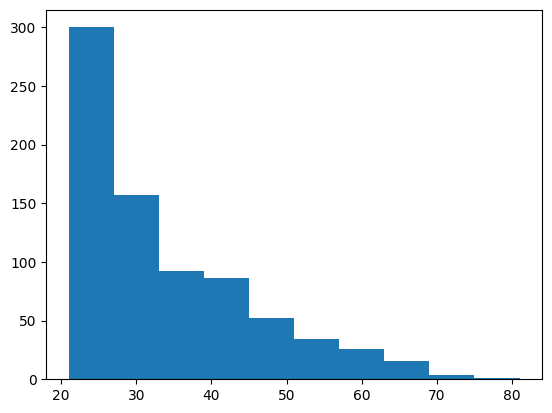

In [157]:
plt.hist(data["Age"])
plt.show();

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 768 BarContainer objects>)

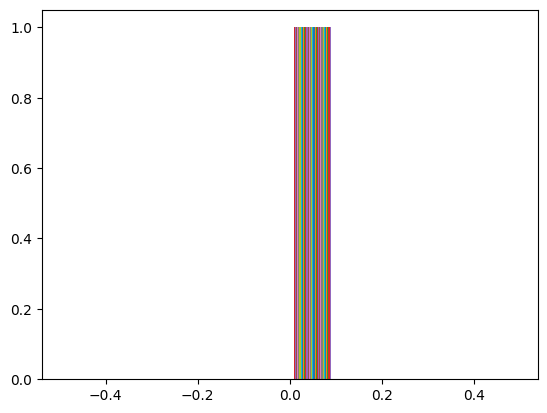

In [158]:
age_scaled = scaler.fit_transform([data["Age"]])
plt.hist(age_scaled)

### **KNN Model Training**

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier(n_neighbors =  10, algorithm = "kd_tree")

In [160]:
model

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [161]:
# Fitting the training data
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

The model accuracy for train data is : 79.15309446254072%
The model accuracy for unseen data is : 76.62337662337663%
The model classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

The model confusion matrix is: 
 [[84 15]
 [21 34]]


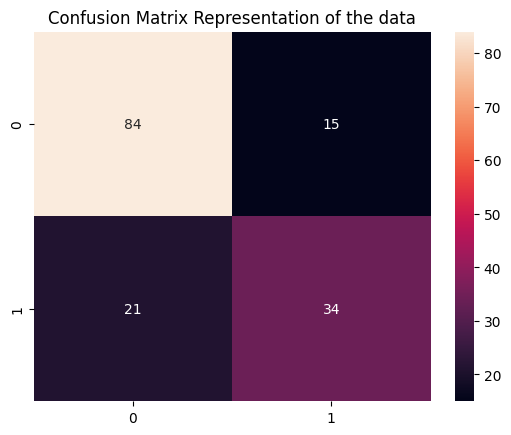

In [162]:
# Return predictions on train
y_pred_train = model.predict(X_train)

model_accuracy_train = accuracy_score(y_train, y_pred_train)*100
print(f"The model accuracy for train data is : {model_accuracy_train}%")

# Return predictions
y_pred = model.predict(X_test)
df = pd.DataFrame({"Actual Values": y_test,
                    "Predicted Values": y_pred})

model_accuracy = accuracy_score(y_test, y_pred)*100
print(f"The model accuracy for unseen data is : {model_accuracy}%")

report = classification_report(y_test, y_pred)
print("The model classification report is: \n", report)
cn_matrix = confusion_matrix(y_test, y_pred)
print("The model confusion matrix is: \n", cn_matrix)
plt.title("Confusion Matrix Representation of the data")
sns.heatmap(cn_matrix, annot = True)
plt.savefig("Confusion Matrix Representation of the data_{}_.PNG".format(col))
plt.show();

In [163]:
true_positives  = cn_matrix[0][0]
false_negetives  = cn_matrix[0][1]
false_positives  = cn_matrix[1][0]
true_negetives  = cn_matrix[1][1]
cnf_data = pd.DataFrame({"TP":[true_positives],
                        "FN":[false_negetives],
                        "TN":[true_negetives],
                         "FP":[false_positives]})
cnf_data

,TP,FN,TN,FP
0,84,15,34,21


In [164]:
tpr = cnf_data["TP"]/(cnf_data["TP"]+ cnf_data["FN"])
print("TPR : ", tpr)
fnr = cnf_data["FN"]/(cnf_data["TP"]+ cnf_data["FN"])
print("FNR : ", fnr)
fpr = cnf_data["FP"]/(cnf_data["FP"]+ cnf_data["TN"])
print("FPR : ", fpr)
tnr = cnf_data["TN"]/(cnf_data["FP"]+ cnf_data["TN"])
print("TNR : ", tnr)

TPR :  0    0.848485
dtype: float64
FNR :  0    0.151515
dtype: float64
FPR :  0    0.381818
dtype: float64
TNR :  0    0.618182
dtype: float64


#**Elbow Method**

In [165]:
knn_neighbors_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,15,16,16,16,19,20]
accuracy_score_list = []
for n in knn_neighbors_list:
    model = KNeighborsClassifier(n_neighbors =  n, algorithm = "kd_tree")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test,predictions))

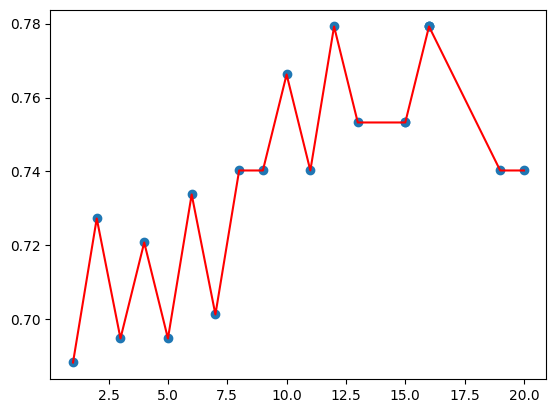

In [166]:
plt.scatter(knn_neighbors_list, accuracy_score_list)
plt.plot(knn_neighbors_list, accuracy_score_list, color = "red")

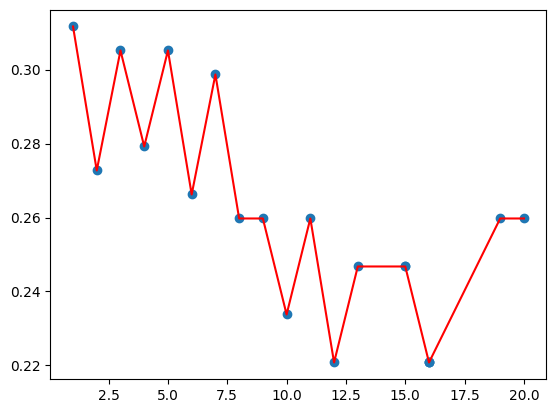

In [167]:
loss_list = []
for acc in accuracy_score_list:
    loss_list.append(1-acc)
plt.scatter(knn_neighbors_list, loss_list)
plt.plot(knn_neighbors_list, loss_list, color = "red")

### **Regularization and Hyperparameter Tuning**

#### **Regularization for Logistic Regression**

In [168]:
!pip install scikit-learn==1.2.*

In [169]:
model_log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_log_reg_l2 = LogisticRegression(penalty="l2")

In [170]:
# model_log_reg_l2
model_log_reg_l2.fit(X_train,y_train)
model_log_reg_l2_predictions = model_log_reg_l2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [172]:
# model_log_reg_elastic
from sklearn.linear_model import ElasticNet

model_log_reg_elastic = ElasticNet()
model_log_reg_elastic.fit(X_train,y_train)
model_log_reg_elastic_predictions = model_log_reg_elastic.predict(X_test)

In [173]:
# model_log_reg_l1
model_log_reg_l1.fit(X_train,y_train)
model_log_reg_l1_predictions = model_log_reg_l1.predict(X_test)

In [174]:
model_log_reg_l1_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [175]:
model_log_reg_l2_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [176]:
model_log_reg_elastic_predictions

array([ 0.2642698 ,  0.27548221,  0.22531569,  0.23078732,  0.48147309,
        0.35576236, -0.03929231,  0.37441785,  0.54547433,  0.61814564,
        0.29092882,  0.78474203,  0.48095049,  0.25068533,  0.10197785,
        0.36046099,  0.14985019,  0.10779798,  0.69011723,  0.48355339,
        0.28678567,  0.14689638,  0.33128129,  0.17073284,  0.43658084,
        0.75327379,  0.21964626,  0.14129445,  0.28081242,  0.17538209,
        0.67129161,  0.64646366,  0.72636535,  0.6000732 ,  0.41429837,
        0.53627122,  0.89667831,  0.3005694 ,  0.41973251,  0.44294969,
        0.10279446,  0.50023999,  0.39791029,  0.26492547,  0.09817489,
        0.53804872,  0.4012923 ,  0.21149699,  0.33830343,  0.81264788,
        0.11171415,  0.54534704,  0.58457768,  0.3691532 ,  0.35229847,
        0.03341634,  0.6515799 , -0.10268562,  0.35265143,  0.64796351,
        0.57990216,  0.35954963,  0.41932807,  0.19788095,  0.13779826,
        0.52436804,  0.06895527,  0.54723784,  0.15427376,  0.67

#### **Hyperparameter Tuning :**

- There are ideally two approaches for the hyperparameter Tuning.

- **Approach 1 GridSearchCV :**
    - With the gridsearchCV module we fit every hyperparameter that we explicitly specify in the parameter grid and train our model accordingly.
    - As this approach takes care of all of the hyperparameters specified hence, it takes more computation time.
    - However, it is shown that the accuracy with GridSearchCV is high.


 - **Approach 2 RandomSearchCV :**
    - With the RandomearchCV module we fit every hyperparameter that we explicitly specify in the parameter grid at a random and train our model accordingly.
    - As this approach takes care of all of the hyperparameters specified at a random hence, it takes less computation time.
    - However, it is shown that the accuracy with RandomSearchCV is relatively lower than that of the GridSearchCV.

#### **GridSearchCV**

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = [{"penalty": ["l1", "elasticnet", 'none'],
              'C' :np.logspace(-4,4,20),
              'solver': ['liblinear','sag','saga', 'newton-cg',],
              'max_iter' : [100,1000,2500,5000]}]
              #"fit_intercept":[True,False]}
model_grid_search = GridSearchCV(LogisticRegression(), param_grid)
model_grid_search.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'elasticnet', 'none'],
                          'solver': ['liblinear', 'sag', 'saga', 'newton-cg']}])

In [178]:
model_grid_search.best_params_

{'C': 1.623776739188721,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [179]:
# log_reg_tuned = LogisticRegression(fit_intercept=True,
#                                     penalty='l2')

#  log_reg_tuned.fit(X_train,y_train)
#  tuned_predictions = log_reg_tuned.predict(X_test)

#### **RandomSearchCV**

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_random_search = {"penalty": ["l1", "l2", "elasticnet", None],
              "fit_intercept":[True,False]}
model_random_search = RandomizedSearchCV(LogisticRegression(),
                                         param_distributions=param_random_search)
model_random_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]})

In [181]:
model_random_search.best_params_

{'penalty': 'l2', 'fit_intercept': True}

In [182]:
log_reg_tuned = LogisticRegression(fit_intercept=True,
                                   penalty='l2')

log_reg_tuned.fit(X_train,y_train)
tuned_predictions = log_reg_tuned.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
accuracy_score(tuned_predictions,y_test)

0.7532467532467533

###**SVM**

In [184]:
from sklearn.svm import SVC
model_svc = SVC()

In [185]:
## Training the SVCClassifier
model_svc.fit(X_train, y_train)

SVC()

In [186]:
svc_predictions_train  = model_svc.predict(X_train)
print("Accuracy Score for SVC(Train) is :", accuracy_score(svc_predictions_train,y_train))

Accuracy Score for SVC(Train) is : 0.7752442996742671


In [187]:
svc_predictions  = model_svc.predict(X_test)

In [188]:
print("Accuracy Score for SVC is :", accuracy_score(svc_predictions,y_test))

Accuracy Score for SVC is : 0.7727272727272727


In [189]:
svc_predictions_train

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

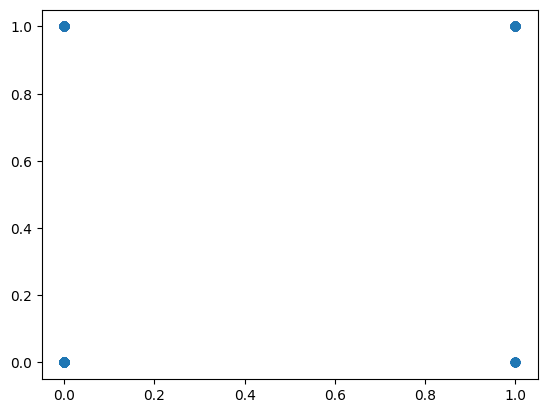

In [190]:
plt.scatter(svc_predictions_train,y_train)

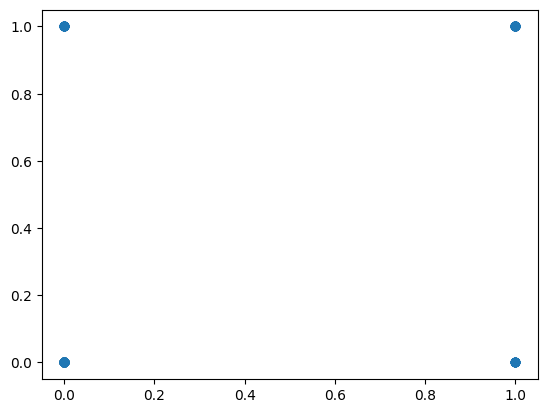

In [191]:
plt.scatter(svc_predictions,y_test)

In [192]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [193]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [194]:
predictions_naive_bayes_train = model_nb.predict(X_train)
predictions_naive_bayes = model_nb.predict(X_test)

print("Accuracy Score for Naive Bayes(Train) is :", accuracy_score(predictions_naive_bayes_train,y_train))
print("Accuracy Score for Naive Bayes(Test) is :", accuracy_score(predictions_naive_bayes,y_test))

Accuracy Score for Naive Bayes(Train) is : 0.744299674267101
Accuracy Score for Naive Bayes(Test) is : 0.7532467532467533


### **DTClassifier**

In [195]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
dt_predictions = model_dt.predict(X_test)

In [196]:
range(len(X_test))

range(0, 154)

In [197]:
index_list_test = []
for index in range(len(X_test)):
    index_list_test.append(index)

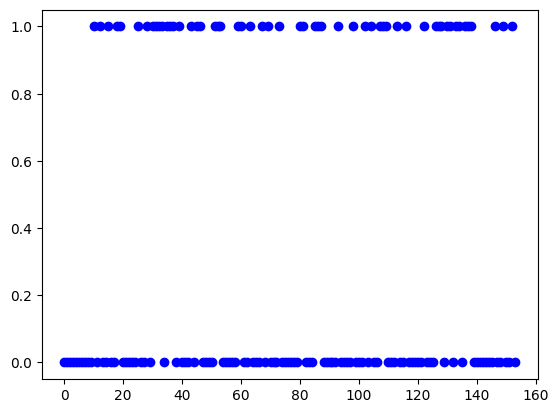

In [198]:
plt.scatter(index_list_test, y_test, color = "blue", label = "Actual Data")
plt.show();

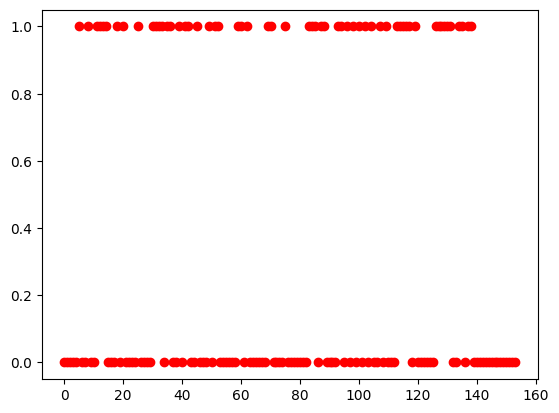

In [199]:
plt.scatter(index_list_test, dt_predictions, color = "red", label = "Predicted DT")

In [200]:
predictions_dt_train = model_dt.predict(X_train)
predictions_dt_test = model_dt.predict(X_test)

print("Accuracy Score for DTClassifier(Train) is :", accuracy_score(predictions_dt_train,y_train))
print("Accuracy Score for DTClassifier(Test) is :", accuracy_score(predictions_dt_test,y_test))

Accuracy Score for DTClassifier(Train) is : 1.0
Accuracy Score for DTClassifier(Test) is : 0.7077922077922078


In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ["gini", "entropy", "log_loss"],
              "splitter" : ["best" , "random"],
              "max_features": ["auto", "sqrt", "log2"]
              }

model_grid_search = GridSearchCV(DecisionTreeClassifier(),
                                 param_grid)

model_grid_search.fit(X_train,y_train)

model_grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}

In [202]:
dt_tuned = DecisionTreeClassifier(criterion= "gini",
                                       max_features =  'log2',
                                       splitter = 'best')

dt_tuned.fit(X_train,y_train)
tuned_dt_predictions_train = dt_tuned.predict(X_train)
tuned_dt_predictions_test = dt_tuned.predict(X_test)

print("DT Accuracy-Train(Tuned)", accuracy_score(tuned_dt_predictions_train,y_train))
print("DT Accuracy-Test(Tuned)", accuracy_score(tuned_dt_predictions_test,y_test))

DT Accuracy-Train(Tuned) 1.0
DT Accuracy-Test(Tuned) 0.6948051948051948


### **Cross Validation**

In [203]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data.drop(["Outcome"], axis =1 )     # Except for Exited all the other data is my features. Hence, we need to drop it.
y = data["Outcome"]                      # Exited is the target


# Training and the Test Data
# 80% of the data ---> Training
# 20 % of the data ---> Test --> test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [204]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.2)

In [205]:
print(data.shape)
print("-------------All X------------- ")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print("*"*50)
print("-------------All Y------------- ")
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(768, 9)
-------------All X------------- 
(491, 8)
(123, 8)
(154, 8)
**************************************************
-------------All Y------------- 
(491,)
(123,)
(154,)


### **Random Forest Classifier**

In [206]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf_predictions_train = model_rf.predict(X_train)
model_rf_predictions_test = model_rf.predict(X_test)

In [207]:
print("Random Forest Accuracy-Train(Tuned)", accuracy_score(model_rf_predictions_train,y_train))
print("Random Forest Accuracy-Test(Tuned)", accuracy_score(model_rf_predictions_test,y_test))

Random Forest Accuracy-Train(Tuned) 1.0
Random Forest Accuracy-Test(Tuned) 0.7532467532467533


### **All Results**

In [208]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [209]:
model_list =[LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             DecisionTreeClassifier(),
             GaussianNB(),
             RandomForestClassifier()
             ]

precision_list_train = []
precision_list_valid = []
precision_list_test = []
recall_list_train = []
recall_list_valid = []
recall_list_test = []
accuracy_score_train = []
accuracy_score_valid = []
accuracy_score_test = []
f1_score_train = []
f1_score_valid = []
f1_score_test = []

for model in model_list:
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    ## Precision
    precision_list_train.append(precision_score(train_pred, y_train))
    precision_list_valid.append(precision_score(valid_pred, y_val))
    precision_list_test.append(precision_score(test_pred, y_test))

    ## Recall
    recall_list_train.append(recall_score(train_pred, y_train))
    recall_list_valid.append(recall_score(valid_pred, y_val))
    recall_list_test.append(recall_score(test_pred, y_test))

    ## Accuracy
    accuracy_score_train.append(accuracy_score(train_pred, y_train))
    accuracy_score_valid.append(accuracy_score(valid_pred, y_val))
    accuracy_score_test.append(accuracy_score(test_pred, y_test))

    ## F1 Score
    f1_score_train.append(f1_score(train_pred, y_train))
    f1_score_valid.append(f1_score(valid_pred, y_val))
    f1_score_test.append(f1_score(test_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
final_score_df = pd.DataFrame({"Model" : model_list,
                               "precision_list_train":precision_list_train,
                               "precision_list_valid":precision_list_valid,
                               "precision_list_test":precision_list_test,
                               "recall_list_train":recall_list_train,
                               "recall_list_valid":recall_list_valid,
                               "recall_list_test":recall_list_test,
                               "accuracy_score_train":accuracy_score_train,
                               "accuracy_score_valid":accuracy_score_valid,
                               "accuracy_score_test":accuracy_score_test,
                                "f1_score_train":f1_score_train,
                               "f1_score_valid":f1_score_valid,
                               "f1_score_test":f1_score_test,

                               })
final_score_df

,Model,precision_list_train,precision_list_valid,precision_list_test,recall_list_train,recall_list_valid,recall_list_test,accuracy_score_train,accuracy_score_valid,accuracy_score_test,f1_score_train,f1_score_valid,f1_score_test
0,LogisticRegression(),0.581818,0.627907,0.533333,0.721805,0.771429,0.711111,0.784114,0.804878,0.733766,0.644295,0.692308,0.609524
1,KNeighborsClassifier(),0.660606,0.511628,0.583333,0.731544,0.785714,0.593220,0.804481,0.780488,0.681818,0.694268,0.619718,0.588235
2,SVC(),0.448485,0.488372,0.483333,0.747475,0.875000,0.783784,0.763747,0.796748,0.746753,0.560606,0.626866,0.597938
3,DecisionTreeClassifier(),1.000000,0.674419,0.516667,1.000000,0.659091,0.620000,1.000000,0.764228,0.688312,1.000000,0.666667,0.563636
4,GaussianNB(),0.587879,0.581395,0.633333,0.673611,0.675676,0.666667,0.765784,0.756098,0.733766,0.627832,0.625000,0.649573
5,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.627907,0.500000,1.000000,0.771429,0.714286,1.000000,0.804878,0.727273,1.000000,0.692308,0.588235


In [211]:
final_score_df.columns

Index(['Model', 'precision_list_train', 'precision_list_valid',
       'precision_list_test', 'recall_list_train', 'recall_list_valid',
       'recall_list_test', 'accuracy_score_train', 'accuracy_score_valid',
       'accuracy_score_test', 'f1_score_train', 'f1_score_valid',
       'f1_score_test'],
      dtype='object')

In [212]:
cols = ['precision_list_train', 'precision_list_valid',
       'precision_list_test', 'recall_list_train', 'recall_list_valid',
       'recall_list_test', 'accuracy_score_train', 'accuracy_score_valid',
       'accuracy_score_test', 'f1_score_train', 'f1_score_valid',
       'f1_score_test']


In [213]:
len(final_score_df['Model'])

6

In [219]:
final_score_df = pd.DataFrame({"Model" : model_list,

                               "accuracy_score_train":accuracy_score_train,
                               "accuracy_score_valid":accuracy_score_valid,
                               "accuracy_score_test":accuracy_score_test,
                               })
final_score_df

,Model,accuracy_score_train,accuracy_score_valid,accuracy_score_test
0,LogisticRegression(),0.784114,0.804878,0.733766
1,KNeighborsClassifier(),0.804481,0.780488,0.681818
2,SVC(),0.763747,0.796748,0.746753
3,DecisionTreeClassifier(),1.000000,0.764228,0.688312
4,GaussianNB(),0.765784,0.756098,0.733766
5,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.804878,0.727273


In [220]:
final_score_df["Model"] =["LogisticRegression", "KNeighborsClassifier()", "SVC()",
       "DecisionTreeClassifier()", "GaussianNB()", "RandomForestClassifier()"]

In [224]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [226]:
from catboost import CatBoostClassifier

In [227]:
model_catboost = CatBoostClassifier()

In [228]:
# Train the model_catboost
model_catboost.fit(X_train, y_train)
model_catboost_train_pred = model_catboost.predict(X_train)
model_catboost_test_pred = model_catboost.predict(X_test)


print(f"Training Accuracy for CatboostClassifier is : {accuracy_score(model_catboost_train_pred,y_train)}")
print(f"Test Accuracy for CatboostClassifier is : {accuracy_score(model_catboost_test_pred,y_test)}")

Learning rate set to 0.007604
0:	learn: 0.6889648	total: 47.9ms	remaining: 47.9s
1:	learn: 0.6849796	total: 49.4ms	remaining: 24.6s
2:	learn: 0.6812140	total: 51ms	remaining: 17s
3:	learn: 0.6777806	total: 52.7ms	remaining: 13.1s
4:	learn: 0.6746870	total: 54.5ms	remaining: 10.9s
5:	learn: 0.6701185	total: 56.2ms	remaining: 9.3s
6:	learn: 0.6663841	total: 58.1ms	remaining: 8.24s
7:	learn: 0.6631111	total: 59.9ms	remaining: 7.43s
8:	learn: 0.6599539	total: 61.7ms	remaining: 6.79s
9:	learn: 0.6559613	total: 63.3ms	remaining: 6.26s
10:	learn: 0.6522669	total: 64.9ms	remaining: 5.83s
11:	learn: 0.6490567	total: 66.5ms	remaining: 5.47s
12:	learn: 0.6465524	total: 68.1ms	remaining: 5.17s
13:	learn: 0.6431174	total: 69.8ms	remaining: 4.91s
14:	learn: 0.6398391	total: 71.4ms	remaining: 4.68s
15:	learn: 0.6363540	total: 73ms	remaining: 4.49s
16:	learn: 0.6324608	total: 74.6ms	remaining: 4.31s
17:	learn: 0.6292061	total: 76.1ms	remaining: 4.15s
18:	learn: 0.6258782	total: 77.7ms	remaining: 4.01s

In [229]:
# Train the GradientBoostingClassifier
model_xgb = GradientBoostingClassifier()
model_xgb.fit(X_train, y_train)
model_xgb_train_pred = model_xgb.predict(X_train)
model_xgb_test_pred = model_xgb.predict(X_test)


print(f"Training Accuracy for model_xgb is : {accuracy_score(model_xgb_train_pred,y_train)}")
print(f"Test Accuracy for model_xgb is : {accuracy_score(model_xgb_test_pred,y_test)}")

Training Accuracy for model_xgb is : 0.9409368635437881
Test Accuracy for model_xgb is : 0.7142857142857143
